## Use stenv (environment with old photutils)

Explicitly calling photutils_detection with use_seg=True give the same results as just running the sim with a seg_file, but providing no catalog.

In [11]:
# Imports
import grizli
import grizli.model

# General Imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/FOV0_sims/fits")
direct_file = "rotated_direct.fits"

In [12]:
pad = 100
roman_sim = grizli.model.GrismFLT(direct_file=direct_file, pad=pad)

In [13]:
## Make a simple detection catalog + segmentation image with photutils.
roman_sim.photutils_detection(detect_thresh=2, grow_seg=0, gauss_fwhm=2., 
                             verbose=True)

rotated_direct: photutils.detect_sources (detect_thresh=2.0, grow_seg=0, gauss_fwhm=2.0, ZP=0.0)


rotated_direct: photutils.source_properties


        Use `~photutils.segmentation.SourceCatalog` instead. [grizli.utils]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Rename column: xcentroid -> x_flt
Rename column: ycentroid -> y_flt
rotated_direct: photutils.source_properties - 2 objects


True

In [14]:
roman_sim.compute_full_model(mag_limit=28)


########################################## 
# ! Exception (2024-06-21 15:35:37.388)
#
# !Traceback (most recent call last):
# !  File "/Users/keith/miniconda3/envs/stenv/lib/python3.12/site-packages/grizli/model.py", line 419, in process_config
# !    self.flat_index = self.idx[dyc + self.x0[0], self.dxpix]
# !                      ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# !IndexError: index 85 is out of bounds for axis 0 with size 52
# !
# !During handling of the above exception, another exception occurred:
# !
# !Traceback (most recent call last):
# !  File "/Users/keith/miniconda3/envs/stenv/lib/python3.12/site-packages/grizli/model.py", line 3173, in compute_model_orders
# !    beam = GrismDisperser(id=id,
# !           ^^^^^^^^^^^^^^^^^^^^^
# !  File "/Users/keith/miniconda3/envs/stenv/lib/python3.12/site-packages/grizli/model.py", line 289, in __init__
# !    self.process_config()
# !IndexError
# !
######################################### 




Text(0.5, 1.0, 'photutils_detections using our seg map')

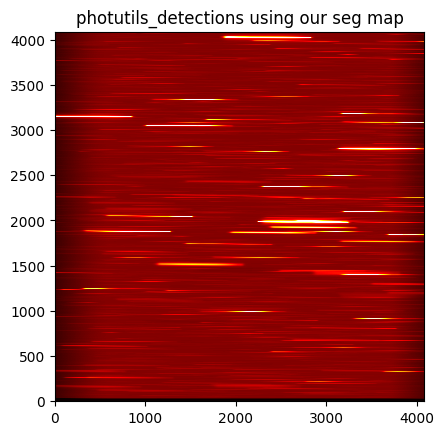

In [15]:
plt.imshow(roman_sim.model[pad:-pad, pad:-pad]/np.max(roman_sim.model), interpolation='Nearest', 
           origin='lower', vmin=0., vmax=0.03, cmap='hot')
plt.title("photutils_detections using our seg map")

In [16]:
raise Exception("Pause before saving")

Exception: Pause before saving

In [17]:
header = fits.open(direct_file)[1].header
fits.writeto("basic_model-no-seg.fits", roman_sim.model[pad:-pad, pad:-pad], header=header, overwrite=True)